Задание 7. Исследовательский анализ данных на языке Python

Инструкция:

Шаг 1.  Изучите материалы лекционных и практических занятий по темам раздела 4. 

Шаг 2. Выполните исследовательский анализ данных EDA по предложенному датасету (Алгоритм выполнения представлен в практическом занятии по теме 4.3).

Шаг 3. Опубликуйте файл расширения ipynb на платформе Odin.

По открытым данным о заведениях общественного питания в Москве требуется провести исследование рынка.

## Описание располагаемых данных

Каждая запись характеризуется следующим набором признаков:

|Признак|Описание|
|------:|:-------|
|`id` | идентификатор объекта|
|`object_name` | название объекта общественного питания|
|`chain` | сетевой ресторан|
|`object_type` | тип объекта общественного питания|
|`address` | адрес|
|`number` |  количество посадочных мест|

## Инструкция по выполнению проекта

### Шаг 1. Загрузите данные и подготовьте их к анализу

- Загрузить данные о заведениях общественного питания Москвы.
- Проверить корректность установленных типов данных.
- Проверить наличие пропущенных значений и дубликатов.

### Шаг 2. Разведочный анализ данных
- Исследовать соотношение типов объектов общественного питания по количеству. Построить график.
- Исследовать соотношение сетевых и несетевых заведений по количеству. Построить график. 
- Установить для какого типа объекта общественного питания характерно сетевое распространение.
- Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
- Для каждого типа объекта общественного питания найти среднее количество посадочных мест. Какой тип предоставляет в среднем самое большое количество посадочных мест? Построить графики.
- Выделить в отдельный столбец информацию об улице из столбца `address`.
- Построить график топ-10 улиц по количеству объектов общественного питания.

In [1]:
# Загрузка данных и подготовка их к анализу
import json
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import scipy.stats as stats
import seaborn as sns
import warnings
import plotly.express as px

In [2]:
df = pd.read_csv('/content/restaurant.csv')
df

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


Исследование соотношения видов объектов общественного питания по количеству

In [3]:
print("Number of records (patients): ", df.shape[0])
print("Number of columns (features): ", df.shape[1])

Number of records (patients):  15366
Number of columns (features):  6


In [4]:
# получение информации о данных
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [5]:
#поработаем с посадочными местами:изменим названием столбца и сэкономим память откорректировав тип данных
df['number'] = df['number'].astype('int16')
df = df.rename(columns={'number':'number_of_seats'})

In [6]:
# просмотр значений для поиска 
df.describe()

,id,number_of_seats
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000


In [7]:
#список значений столбцов
df.columns.tolist()

['id', 'object_name', 'chain', 'object_type', 'address', 'number_of_seats']

In [8]:
for col in df.select_dtypes('object'):
    print('--'*10)
    print(df[col].unique())
    print('--'*10)

--------------------
['СМЕТАНА' 'Родник' 'Кафе «Академия»' ... 'Бар Мята Lounge'
 'Мята Lounge Октябрьская' 'Кальянная «Мята Lounge»']
--------------------
--------------------
['нет' 'да']
--------------------
--------------------
['кафе' 'столовая' 'закусочная' 'предприятие быстрого обслуживания'
 'ресторан' 'кафетерий' 'буфет' 'бар' 'магазин (отдел кулинарии)']
--------------------
--------------------
['город Москва, улица Егора Абакумова, дом 9'
 'город Москва, улица Талалихина, дом 2/1, корпус 1'
 'город Москва, Абельмановская улица, дом 6' ...
 'город Москва, Салтыковская улица, дом 7Г'
 'город Москва, Осенний бульвар, дом 9'
 'город Москва, улица Новый Арбат, дом 13']
--------------------


In [9]:
df.columns

Index(['id', 'object_name', 'chain', 'object_type', 'address',
       'number_of_seats'],
      dtype='object')

In [10]:
def str_title(x:str)->str:
    return x.title()

In [11]:
str.title('СМЕТАНА')

'Сметана'

In [12]:
#приведение к ниженму регистру значений признаков

#приведение к ниженму регистру значений признаков
df['object_name'] = df['object_name'].str.title()  


In [13]:
#проверка
df.head(20)

,id,object_name,chain,object_type,address,number_of_seats
0,151635,Сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,Пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая Метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,Стол. При Гоу Сош № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет Мтуси,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,Кпф Семья-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая Мтуси,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


In [14]:
df.duplicated().sum()


0

In [15]:
df.drop(columns=['id']).duplicated().sum()

85

In [16]:
duplicates=df.drop(columns=['id']).duplicated()

In [17]:

df=df[~duplicates]

In [18]:
#работа с пропусками данных количество
print(df.isna().sum())
print(df.isna().sum().sum())

id                 0
object_name        0
chain              0
object_type        0
address            0
number_of_seats    0
dtype: int64
0


In [19]:
df

,id,object_name,chain,object_type,address,number_of_seats
0,151635,Сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,Пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая Метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


Лидирующее место занимают "кафе", далее идут "столовая", "ресторан" и "фаст-фуд", количество остальных объектов незначительно.

In [20]:
# 
df.groupby('object_type')['object_name'].count().sort_values()

object_type
магазин (отдел кулинарии)             273
закусочная                            348
кафетерий                             395
буфет                                 576
бар                                   855
предприятие быстрого обслуживания    1897
ресторан                             2282
столовая                             2584
кафе                                 6071
Name: object_name, dtype: int64

In [21]:
#приведем длинные названия типов объектов к более понятным
df['object_type'] = df['object_type'].str.replace('предприятие быстрого обслуживания', 'фаст-фуд')
df['object_type'] = df['object_type'].str.replace('магазин \(отдел кулинарии\)', 'кулинария')

<ipython-input-21-9a00c32b4c67>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['object_type'] = df['object_type'].str.replace('магазин \(отдел кулинарии\)', 'кулинария')


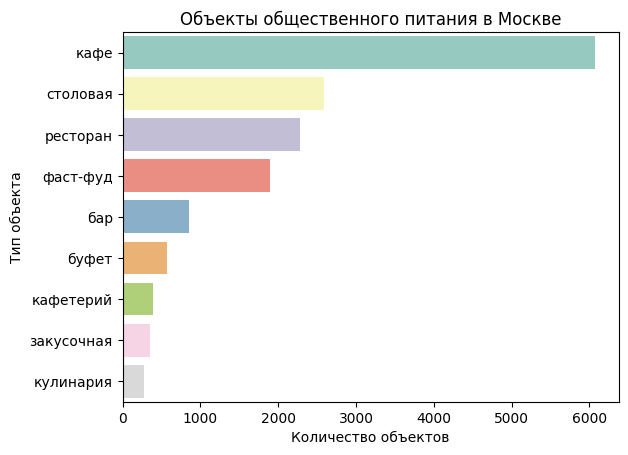

In [22]:
temp = df.groupby('object_type').count().reset_index()
ax = sns.barplot(x='number_of_seats', y='object_type', data=temp.sort_values('number_of_seats', ascending=False), palette="Set3")
ax.set_title('Объекты общественного питания в Москве')
ax.set_xlabel('Количество объектов')
ax.set_ylabel('Тип объекта')
plt.show()

In [23]:
df['chain'] = df['chain'].map({'нет':'несетевой','да':'сетевой'})
df.groupby('chain')['object_name'].count().sort_values()

chain
сетевой       2964
несетевой    12317
Name: object_name, dtype: int64

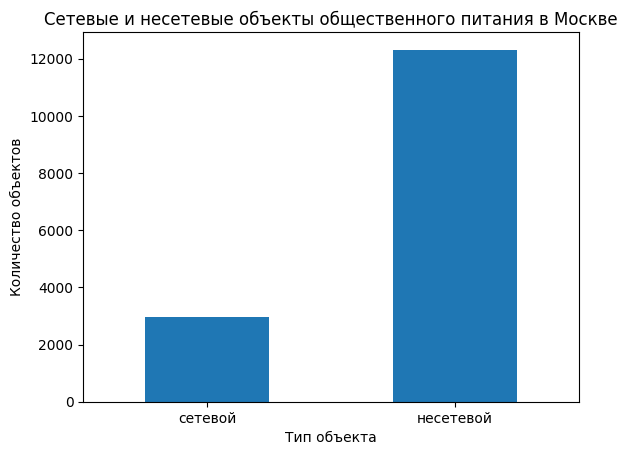

In [24]:
ax = df.groupby('chain')['object_name'].count().sort_values().plot(kind='bar')
ax.set_title('Сетевые и несетевые объекты общественного питания в Москве')
ax.set_xlabel('Тип объекта')
ax.set_ylabel('Количество объектов')
plt.xticks(rotation=0)
plt.show()

In [25]:
# Создадим сводную таблицу
df_pivot = df.pivot_table(index='object_type', values='id', columns='chain', aggfunc='count').reset_index()
df_pivot['share_chain %'] = ((df_pivot['сетевой'] / (df_pivot['сетевой'] + df_pivot['несетевой'])) * 100).round(2)
df_pivot.drop(df_pivot.columns[[1,2]], axis=1, inplace=True)
df_pivot = df_pivot.sort_values('share_chain %', ascending = False)

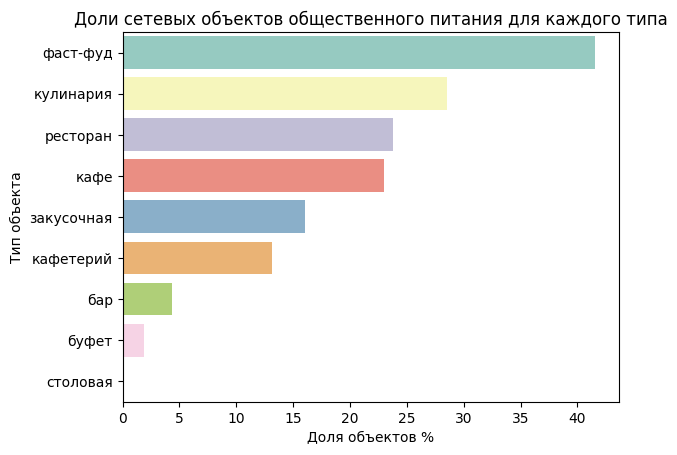

In [26]:
ax = sns.barplot(x='share_chain %', y='object_type', data=df_pivot.sort_values('share_chain %', ascending=False), palette="Set3")
ax.set_title('Доли сетевых объектов общественного питания для каждого типа')
ax.set_xlabel('Доля объектов %')
ax.set_ylabel('Тип объекта')
plt.show()

In [27]:
# Выделим сетевые заведения, сгруппируем данные по заведениям и найдем среднее количество посадочных мест и количество заведений. Затем построим график.
chain_object = df.query('chain == "да"')
chain_group =  df.groupby('object_name').agg({'id': 'count', 'number_of_seats' : 'mean'}).sort_values(by = 'id', 
                                                                                                      ascending = False)
fig = px.scatter(chain_group, x="id", y="number_of_seats",color="number_of_seats", color_continuous_scale=px.colors.sequential.Viridis,
                 render_mode="webgl", width=600, height=600)
fig.show()

Вывод:для сетевых заведений Москвы характерно большое количество точек с небольшим количеством посадочных мест.

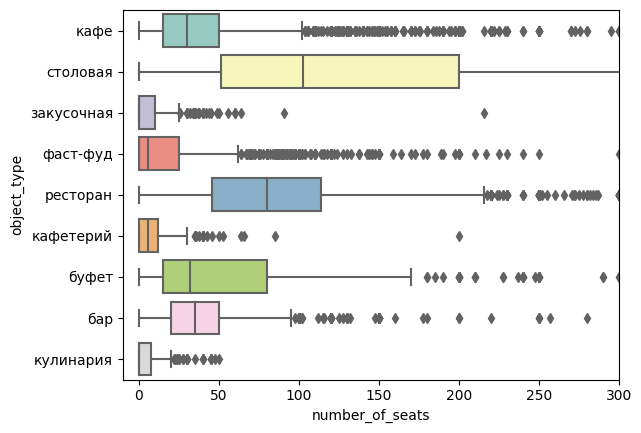

In [28]:
ax = sns.boxplot(x='number_of_seats', y='object_type', data=df, palette="Set3")
ax.set_xlim(-10,300)
plt.show()

In [29]:
df.groupby('object_type')['number_of_seats'].describe().sort_values(by='50%')

,count,mean,std,min,25%,50%,75%,max
object_type,,,,,,,,
закусочная,348.0,7.847701,16.884497,0.0,0.0,0.0,10.0,216.0
кулинария,273.0,5.589744,9.872729,0.0,0.0,0.0,8.0,50.0
кафетерий,395.0,9.184810,14.677023,0.0,0.0,6.0,12.0,200.0
фаст-фуд,1897.0,20.808645,38.563004,0.0,0.0,6.0,25.0,580.0
кафе,6071.0,39.785703,37.751163,0.0,15.0,30.0,50.0,533.0
буфет,576.0,51.425347,56.512850,0.0,15.0,32.0,80.0,320.0
бар,855.0,43.533333,67.112342,0.0,20.0,35.0,50.0,1700.0
ресторан,2282.0,96.884750,94.781446,0.0,46.0,80.0,114.0,1500.0
столовая,2584.0,130.337848,95.189104,0.0,51.5,103.0,200.0,1400.0


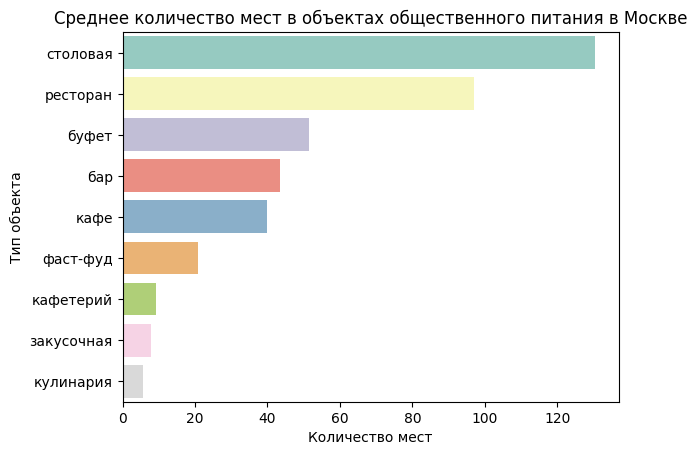

In [30]:
temp = df.groupby('object_type').agg({'number_of_seats' : 'mean'}).sort_values(by = 'number_of_seats', ascending = False).reset_index()
ax = sns.barplot(x='number_of_seats', y='object_type', data=temp, palette="Set3")
ax.set_title('Среднее количество мест в объектах общественного питания в Москве')
ax.set_xlabel('Количество мест')
ax.set_ylabel('Тип объекта')
plt.xticks(rotation=0)
plt.show()

Вывод:Столовые и рестораны по числу посадочных мест  на лидирующих позициях, в сегменте 40-60 мест - бары и буфеты и кафе. 

In [31]:
#проведем некоторые преобразования чтобы проще было выделить улицу
symbols = [',', '«', '»', '(', ')', '"', '  ']

for s in symbols:
    df['address'] = df['address'].str.replace(s, ' ')
df['address'] = df['address'].str.replace('ё','е')

<ipython-input-31-c7aee6a62119>:5: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [32]:
address = df['address'].to_list()
streets = []

for street in address:  
    start = street.find('город москва')
    end = street.find('дом ')
    streets.append(street[start+12:end-1])

df['street_name'] = streets    
df.head(10)  

,id,object_name,chain,object_type,address,number_of_seats,street_name
0,151635,Сметана,несетевой,кафе,город Москва улица Егора Абакумова дом 9,48,а улица Егора Абакумова
1,77874,Родник,несетевой,кафе,город Москва улица Талалихина дом 2/1 корпус 1,35,а улица Талалихина
2,24309,Кафе «Академия»,несетевой,кафе,город Москва Абельмановская улица дом 6,95,а Абельмановская улица
3,21894,Пиццетория,сетевой,кафе,город Москва Абрамцевская улица дом 1,40,а Абрамцевская улица
4,119365,Кафе «Вишневая Метель»,несетевой,кафе,город Москва Абрамцевская улица дом 9 корпус 1,50,а Абрамцевская улица
5,27429,Стол. При Гоу Сош № 1051,несетевой,столовая,город Москва Абрамцевская улица дом 15 корпус 1,240,а Абрамцевская улица
6,148815,Брусника,сетевой,кафе,город Москва переулок Сивцев Вражек дом 6/2,10,а переулок Сивцев Вражек
7,20957,Буфет Мтуси,несетевой,столовая,город Москва Авиамоторная улица дом 8 строение 1,90,а Авиамоторная улица
8,20958,Кпф Семья-1,несетевой,столовая,город Москва Авиамоторная улица дом 8 строение 1,150,а Авиамоторная улица
9,28858,Столовая Мтуси,несетевой,столовая,город Москва Авиамоторная улица дом 8 строение 1,120,а Авиамоторная улица


In [33]:
temp = df.groupby('street_name').count().sort_values(by='object_type', ascending=False).head(10).reset_index()
top_10 = list(temp['street_name'])
temp

,street_name,id,object_name,chain,object_type,address,number_of_seats
0,а проспект Мира,203,203,203,203,203,203
1,а Профсоюзная улица,181,181,181,181,181,181
2,а Ленинградский проспект,169,169,169,169,169,169
3,а Пресненская набережная,167,167,167,167,167,167
4,а Варшавское шоссе,155,155,155,155,155,155
5,а Ленинский проспект,147,147,147,147,147,147
6,а проспект Вернадского,127,127,127,127,127,127
7,а Кутузовский проспект,114,114,114,114,114,114
8,а Каширское шоссе,103,103,103,103,103,103
9,а Ходынский бульвар,102,102,102,102,102,102


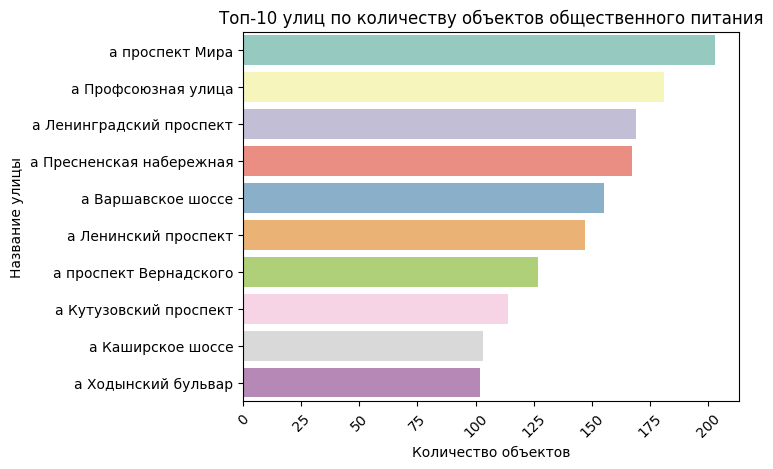

In [34]:
ax = sns.barplot(x='object_type', y='street_name', data=temp, palette="Set3")
ax.set_title('Топ-10 улиц по количеству объектов общественного питания')
ax.set_xlabel('Количество объектов')
ax.set_ylabel('Название улицы')
plt.xticks(rotation=45)
plt.show()

Вывод: Лидером среди улиц, с наибольшим колличеством точек общественного питания, является проспект Мира.